In [1]:
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from math import ceil
from matplotlib import cm, colors
from numpy import amin, amax, ravel

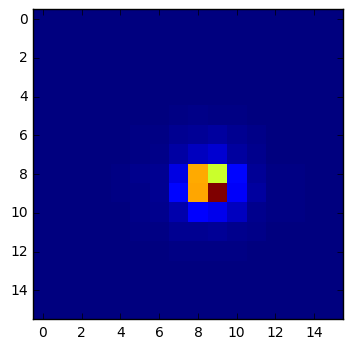

In [3]:
n_k = 16*16*16

k0 = np.zeros((n_k, 3))
p = sqrt(2)/2
b = np.array([[-p, p, p],[p, -p, p],[p, p, -p]])
A2 = np.zeros(n_k)
with open("/Users/yao/Google Drive/data/BGW-test/Cs2SnI6/exciton/exciton_01",'r') as f:
    i = 0
    for line in f:
        if line.split()[0] != '#':
            k0[i]=[line.split()[0], line.split()[1], line.split()[2]]
            A2[i]=float(line.split()[3])
            i = i+1
k = np.dot(k0, b)
k_ = np.zeros((n_k, 3))
scaling = 8
size = 16
for i in range(n_k):
    k_[i,0] = int(ceil(scaling*k[i,0]))+scaling
    k_[i,1] = int(ceil(scaling*k[i,1]))+scaling
    k_[i,2] = int(ceil(scaling*k[i,2]))+scaling
x = k_[:,0]
y = k_[:,1]
z = k_[:,2]
image = np.zeros((size, size))
for i in range(len(x)):
    image[int(x[i])][int(y[i])] = A2[i]+image[int(x[i])][int(y[i])]
dd = ravel(image)
vmax = amax(dd)

for i in range(size):
    for j in range(size):
        image[i][j] = image[i][j]/vmax
plt.imshow(image, interpolation = 'nearest',aspect=1)
plt.show()

In [30]:
from numpy import linalg as LA
for i in range(n_k):
    if LA.norm(k[i,:],2)<0.1:
        print(i, k[i,:])

0 [ 0.01856155  0.03623922  0.04684582]
511 [-0.06982679 -0.05214913 -0.04154252]
